In [1]:
# %pip install git+https://github.com/rwalk/gsdmm.git

In [1]:
import snscrape.modules.twitter as sntwitter
import pandas as pd
import csv
import numpy as np

import contractions
import nltk
from nltk.text import Text
from nltk.corpus import PlaintextCorpusReader
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

import re

In [2]:
df = pd.read_csv('sg_circuit.csv')

In [3]:
df

,url,date,rawContent,renderedContent,id,user,replyCount,retweetCount,likeCount,quoteCount,...,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags,card,viewCount,vibe
0,https://twitter.com/yihyng/status/126723739088...,2020-05-31 23:31:52+00:00,call call day,call call day,1267237390881402881,https://twitter.com/yihyng,0,0,1,0,...,NaN,NaN,NaN,"Coordinates(longitude=103.817832999913, latitu...","Place(id='5f1f473ed6455f55', fullName='North-E...",['covid_19'],NaN,NaN,NaN,NaN
1,https://twitter.com/JuiceTales/status/12672317...,2020-05-31 23:09:36+00:00,enter new phase one period healthy body grab n...,enter new phase one period healthy body grab n...,1267231786632790016,https://twitter.com/JuiceTales,0,0,0,0,...,NaN,NaN,NaN,"Coordinates(longitude=103.90126705, latitude=1...","Place(id='58a4c3a0d54e1400', fullName='Central...",NaN,NaN,NaN,NaN,NaN
2,https://twitter.com/sitimariamah1/status/12672...,2020-05-31 22:45:29+00:00,every new month brings new hope new dream new ...,every new month brings new hope new dream new ...,1267225719047950344,https://twitter.com/sitimariamah1,0,0,1,0,...,NaN,NaN,NaN,"Coordinates(longitude=103.93690062, latitude=1...","Place(id='6635b2fcebd13c64', fullName='East Re...",NaN,NaN,NaN,NaN,NaN
3,https://twitter.com/SajidTweetsBD/status/12671...,2020-05-31 15:23:06+00:00,meanwhile new zealand nine day new covid case ...,meanwhile new zealand nine day new covid case ...,1267114389150134272,https://twitter.com/SajidTweetsBD,0,0,0,0,...,NaN,NaN,NaN,"Coordinates(longitude=103.696411999967, latitu...","Place(id='14d9532bd696d8cb', fullName='North R...",NaN,NaN,NaN,NaN,NaN
4,https://twitter.com/audreytan/status/126710979...,2020-05-31 15:04:52+00:00,pandemic unlocked new thing never thought woul...,pandemic unlocked new thing never thought woul...,1267109798010478593,https://twitter.com/audreytan,0,0,1,0,...,NaN,NaN,NaN,"Coordinates(longitude=103.856, latitude=1.29306)","Place(id='58a4c3a0d54e1400', fullName='Central...",['Covid'],NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1799,https://twitter.com/Godliketrader/status/12452...,2020-04-01 04:46:56+00:00,treated humanity cure coronavirusindia coronav...,treated humanity cure coronavirusindia coronav...,1245211019913248770,https://twitter.com/Godliketrader,0,0,0,0,...,NaN,NaN,NaN,"Coordinates(longitude=103.749959507073, latitu...","Place(id='58a4c3a0d54e1400', fullName='Central...","['COVID19', 'coronavirusindia', 'coronavirus']",NaN,NaN,NaN,NaN
1800,https://twitter.com/paepaesays/status/12451946...,2020-04-01 03:42:04+00:00,coronavirus content created singapore awarene...,coronavirus content created singapore awarenes...,1245194696319578113,https://twitter.com/paepaesays,0,0,0,0,...,NaN,NaN,NaN,"Coordinates(longitude=103.605441448115, latitu...","Place(id='0b37664066a8962a', fullName='West Re...","['coronavirus', 'Singapore', 'COVIDー19', 'awar...",NaN,NaN,NaN,NaN
1801,https://twitter.com/_rodahidup/status/12451895...,2020-04-01 03:21:48+00:00,coronavirus employer singapore must allow staf...,coronavirus employer singapore must allow staf...,1245189593411940352,https://twitter.com/_rodahidup,0,0,0,0,...,NaN,NaN,NaN,"Coordinates(longitude=103.605441448115, latitu...","Place(id='0b37664066a8962a', fullName='West Re...",NaN,NaN,NaN,NaN,NaN
1802,https://twitter.com/_rodahidup/status/12451895...,2020-04-01 03:21:30+00:00,coronavirus employer singapore must allow staf...,coronavirus employer singapore must allow staf...,1245189517931249664,https://twitter.com/_rodahidup,0,0,0,0,...,NaN,NaN,NaN,"Coordinates(longitude=103.605441448115, latitu...","Place(id='0b37664066a8962a', fullName='West Re...",NaN,NaN,NaN,NaN,NaN


In [4]:
df.isna().sum()

url                    0
date                   0
rawContent             0
renderedContent        0
id                     0
user                   0
replyCount             0
retweetCount           0
likeCount              0
quoteCount             0
conversationId         0
lang                   0
source                 0
sourceUrl              0
sourceLabel            0
links                951
media               1517
retweetedTweet      1804
quotedTweet         1661
inReplyToTweetId    1615
inReplyToUser       1615
mentionedUsers      1391
coordinates            0
place                  0
hashtags            1119
cashtags            1804
card                1505
viewCount           1804
vibe                1804
dtype: int64

In [3]:
df['rawContent'].fillna('', inplace=True)
df['renderedContent'].fillna('', inplace=True)

In [4]:
## remove specific word HTTP
df['rawContent'] = df['rawContent'].str.replace('covid', '')
df['rawContent'] = df['rawContent'].str.replace('coronavirus', '')

df['renderedContent'] = df['renderedContent'].str.replace('covid', '')
df['renderedContent'] = df['renderedContent'].str.replace('coronavirus', '')

In [5]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (10, 10))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 10)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()

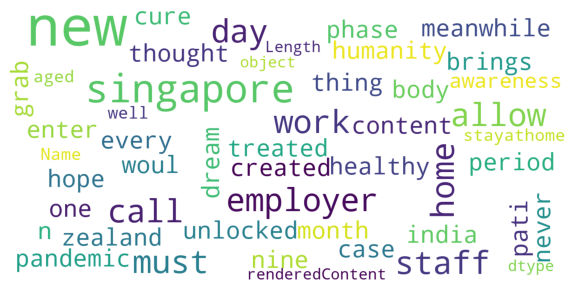

In [8]:
show_wordcloud(df["renderedContent"])

In [6]:
import gensim
from gensim.utils import simple_preprocess

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

In [7]:
data = df['renderedContent'].values.tolist()
data_words = list(sent_to_words(data))
print(data_words[:1][0][:30])

['call', 'call', 'day']


## Building Bi-gram and Tri-gram Models

In [8]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [9]:
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

In [13]:
data_words_bigrams = make_bigrams(data_words)
data_words_bigrams

[['call', 'call', 'day'],
 ['enter',
  'new',
  'phase',
  'one',
  'period',
  'healthy',
  'body',
  'grab',
  'new',
  'promo',
  'juice',
  'set',
  'juice',
  'boost',
  'immunity',
  'contains',
  'balance',
  'fruit',
  'vege',
  'free',
  'delivery'],
 ['every',
  'new',
  'month',
  'brings',
  'new',
  'hope',
  'new',
  'dream',
  'new',
  'wish',
  'amp',
  'paryers',
  'wishing',
  'whole',
  'wide',
  'world',
  'free',
  'virus',
  'amp',
  'vaccine',
  'found',
  'soon',
  'possible'],
 ['meanwhile',
  'new',
  'zealand',
  'nine',
  'day',
  'new',
  'case',
  'patient',
  'hospital',
  'one',
  'active',
  'case',
  'remaining',
  'testing',
  'center',
  'closing',
  'plan',
  'underway',
  'open',
  'travel',
  'epidemiologist',
  'say',
  'nz',
  'chance',
  'eliminating',
  'disease',
  'nz',
  'govt'],
 ['pandemic',
  'unlocked',
  'new',
  'thing',
  'never',
  'thought',
  'would',
  'instance',
  'told',
  'often',
  'geraldtock',
  'green',
  'finger',
  'cac

In [10]:
data_words_trigrams = make_trigrams(data_words)
data_words_trigrams

[['call', 'call', 'day'],
 ['enter',
  'new',
  'phase',
  'one',
  'period',
  'healthy',
  'body',
  'grab',
  'new',
  'promo',
  'juice',
  'set',
  'juice',
  'boost',
  'immunity',
  'contains',
  'balance',
  'fruit',
  'vege',
  'free',
  'delivery'],
 ['every',
  'new',
  'month',
  'brings',
  'new',
  'hope',
  'new',
  'dream',
  'new',
  'wish',
  'amp',
  'paryers',
  'wishing',
  'whole',
  'wide',
  'world',
  'free',
  'virus',
  'amp',
  'vaccine',
  'found',
  'soon',
  'possible'],
 ['meanwhile',
  'new',
  'zealand',
  'nine',
  'day',
  'new',
  'case',
  'patient',
  'hospital',
  'one',
  'active',
  'case',
  'remaining',
  'testing',
  'center',
  'closing',
  'plan',
  'underway',
  'open',
  'travel',
  'epidemiologist',
  'say',
  'nz',
  'chance',
  'eliminating',
  'disease',
  'nz',
  'govt'],
 ['pandemic',
  'unlocked',
  'new',
  'thing',
  'never',
  'thought',
  'would',
  'instance',
  'told',
  'often',
  'geraldtock',
  'green',
  'finger',
  'cac

## Building rough LDA model 

In [11]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_words_trigrams)

# Create Corpus
texts = data_words_trigrams

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1][0][:30])

[(0, 2), (1, 1)]


In [16]:
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=5, 
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)

In [17]:
from pprint import pprint

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.009*"like" + 0.008*"want" + 0.006*"people" + 0.006*"singapore" + '
  '0.006*"news" + 0.005*"one" + 0.005*"go" + 0.005*"take" + 0.005*"keep" + '
  '0.005*"month"'),
 (1,
  '0.041*"singapore" + 0.012*"new" + 0.012*"case" + 0.007*"day" + 0.006*"home" '
  '+ 0.006*"total" + 0.005*"circuitbreaker" + 0.005*"today" + 0.005*"death" + '
  '0.004*"infection"'),
 (2,
  '0.010*"singapore" + 0.009*"time" + 0.009*"home" + 0.007*"stayhome" + '
  '0.006*"day" + 0.006*"amp" + 0.005*"week" + 0.005*"get" + 0.004*"help" + '
  '0.004*"one"'),
 (3,
  '0.008*"world" + 0.008*"pandemic" + 0.005*"home" + 0.005*"amp" + '
  '0.005*"time" + 0.005*"test" + 0.005*"life" + 0.004*"need" + '
  '0.004*"lockdown" + 0.004*"crisis"'),
 (4,
  '0.018*"singapore" + 0.011*"case" + 0.006*"time" + 0.005*"people" + '
  '0.005*"home" + 0.005*"number" + 0.004*"circuit_breaker" + 0.004*"new" + '
  '0.004*"need" + 0.004*"death"')]


In [18]:
from gensim.models import CoherenceModel

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words_trigrams, dictionary=id2word, 
                                     coherence='c_v')

coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score: ', coherence_lda)

Coherence Score:  0.29021853296158406


## Tuning based on number of topics

In [19]:
# supporting function
def compute_coherence_values(corpus, dictionary, k):
       
    # Build LDA model
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=k, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           per_word_topics=True)
    
    # Coherence Score
    coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words_trigrams, dictionary=id2word, 
                                         coherence='c_v')
    
    return coherence_model_lda.get_coherence()

In [20]:
# Can take a long time to run. In this case we are going to k_max=14.
import datetime
print(datetime.datetime.now())

from gensim.models import CoherenceModel

coherence_scores = []
model_topics = []

for k in range(2, 20):
    cv = compute_coherence_values(corpus=corpus, dictionary=id2word,k=k) 
    model_topics.append(k)    
    coherence_scores.append(cv)    
    print("#Topics: " + str(k) + ", Score: " + str(coherence_scores[-1]))

print(datetime.datetime.now())

2023-03-12 00:46:09.171913
#Topics: 2, Score: 0.21061492778933832
#Topics: 3, Score: 0.24179810067234986
#Topics: 4, Score: 0.26457243195441893
#Topics: 5, Score: 0.2940522777966384
#Topics: 6, Score: 0.3391212505713137
#Topics: 7, Score: 0.3231856631889487
#Topics: 8, Score: 0.30183584252367607
#Topics: 9, Score: 0.37103553774008424
#Topics: 10, Score: 0.3991888754200911
#Topics: 11, Score: 0.43898079790549943
#Topics: 12, Score: 0.37928197620422405
#Topics: 13, Score: 0.43395270988737056
#Topics: 14, Score: 0.43222516778224457
#Topics: 15, Score: 0.44641873502808443
#Topics: 16, Score: 0.412116552430167
#Topics: 17, Score: 0.45668375181079923
#Topics: 18, Score: 0.4320859289221396
#Topics: 19, Score: 0.43916249883684655
2023-03-12 00:47:44.663929


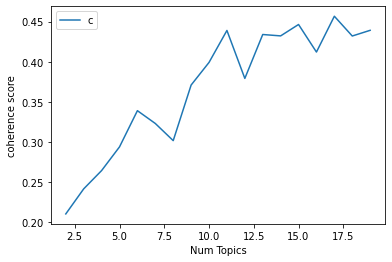

In [21]:
# Show graph

import matplotlib.pyplot as plt

limit=20; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_scores)
plt.xlabel("Num Topics")
plt.ylabel("coherence score")
plt.legend(("coherence score"), loc='best')
plt.show()

In [22]:
end here

SyntaxError: invalid syntax (<ipython-input-22-9bcc9ab561c7>, line 1)

### Final Model

In [11]:
num_topics = 17

lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=num_topics, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10)

In [12]:
# Save the LDA model

from gensim.test.utils import datapath

lda_model_saved_file = datapath("sg_circuit_lda_model_17")
lda_model.save(lda_model_saved_file)

In [24]:
score = CoherenceModel(model=lda_model, texts=data_words_trigrams, dictionary=id2word, coherence='c_v')
score.get_coherence()

0.4406625683922607

In [25]:
import pyLDAvis.gensim_models as gensimvis
import pickle 
import pyLDAvis
import os

# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_data_filepath = os.path.join('./lda_model/sg_circuit_lda_vis_tuned_'+str(num_topics))

# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)

# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)

pyLDAvis.save_html(LDAvis_prepared, './lda_vis/sg_circuit_lda_vis_tuned_'+ str(num_topics) +'.html')

LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
9     -0.150350  0.188316       1        1  11.169549
7      0.119631  0.079128       2        1   7.815443
2     -0.007954  0.055248       3        1   7.033778
1     -0.157518 -0.091393       4        1   7.020160
10     0.012812 -0.010321       5        1   6.638819
4     -0.074202  0.004639       6        1   6.267367
3      0.069278  0.084467       7        1   6.060115
0      0.070272  0.015724       8        1   5.846040
16    -0.037763  0.016087       9        1   5.503106
11     0.056126 -0.045596      10        1   5.385952
14     0.058706  0.009850      11        1   5.021195
5      0.007667 -0.035569      12        1   4.877007
12     0.023550 -0.035335      13        1   4.703128
8     -0.014511 -0.009890      14        1   4.652107
15    -0.109693 -0.098365      15        1   4.500588
13     0.061868 -0.031665      16        1   3.856905
6      0.072081 -0.095324      17        1   3.648741, topic_info=                Term        Freq       Total Category  logprob  loglift
100        singapore  380.000000  380.000000  Default  30.0000  30.0000
14               new  107.000000  107.000000  Default  29.0000  29.0000
39              case  119.000000  119.000000  Default  28.0000  28.0000
149  circuit_breaker   63.000000   63.000000  Default  27.0000  27.0000
374           spread   47.000000   47.000000  Default  26.0000  26.0000
..               ...         ...         ...      ...      ...      ...
52           patient    4.792773   36.214097  Topic17  -5.1541   1.2884
157             next    4.175434   25.539575  Topic17  -5.2920   1.4998
21               amp    4.386163   79.313533  Topic17  -5.2427   0.4158
162             feel    3.674623   23.535382  Topic17  -5.4197   1.4537
274             time    3.907200  126.489318  Topic17  -5.3584  -0.1665

[1036 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
5445      7  0.804692          abc
3545     17  0.784298       access
2136     13  0.884787     accident
420       4  0.115884       across
420       6  0.115884       across
...     ...       ...          ...
1184      9  0.635391         york
2904     16  0.481929      youthsg
5628      1  0.865683        yummy
1452      7  0.935115         zero
4810     14  0.615550  zoommeeting

[2476 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 8, 3, 2, 11, 5, 4, 1, 17, 12, 15, 6, 13, 9, 16, 14, 7])

**Added Sentiment Analysis**

In [11]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

In [12]:
def determine_sentiment(score):
    if score < 0:
        return "Negative"
    elif score > 0:
        return "Positive"
    else:
        return "Neutral"

In [13]:
df["renderedContent"] = df['renderedContent'].apply(lambda tweet:str(tweet))
sentiment_scores = df['rawContent'].apply(sid.polarity_scores)
sentiment_scores

0       {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
1       {'neg': 0.0, 'neu': 0.674, 'pos': 0.326, 'comp...
2       {'neg': 0.0, 'neu': 0.584, 'pos': 0.416, 'comp...
3       {'neg': 0.0, 'neu': 0.847, 'pos': 0.153, 'comp...
4       {'neg': 0.165, 'neu': 0.688, 'pos': 0.147, 'co...
                              ...                        
1799    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
1800    {'neg': 0.0, 'neu': 0.667, 'pos': 0.333, 'comp...
1801    {'neg': 0.233, 'neu': 0.548, 'pos': 0.219, 'co...
1802    {'neg': 0.233, 'neu': 0.548, 'pos': 0.219, 'co...
1803    {'neg': 0.0, 'neu': 0.323, 'pos': 0.677, 'comp...
Name: rawContent, Length: 1804, dtype: object

In [14]:
# Load the saved model

from gensim.test.utils import datapath
lda_model_saved_file = datapath("sg_circuit_lda_model_17")
lda_model = gensim.models.ldamodel.LdaModel.load(lda_model_saved_file)

In [15]:
topics, num_topics = [], 17

for i in range(len(corpus)):
    top_topics = (
        lda_model.get_document_topics(corpus[i],
                                      minimum_probability=0.0))
    topic_vec = [top_topics[i][1] for i in range(num_topics)]
    topics.append(topic_vec.index(max(topic_vec))+1)
    
topics

[6,
 9,
 2,
 5,
 17,
 10,
 2,
 1,
 17,
 8,
 5,
 15,
 8,
 9,
 1,
 14,
 7,
 15,
 12,
 4,
 5,
 17,
 2,
 13,
 17,
 14,
 14,
 7,
 10,
 1,
 8,
 17,
 17,
 2,
 5,
 11,
 6,
 17,
 11,
 15,
 15,
 15,
 8,
 12,
 8,
 6,
 12,
 5,
 11,
 12,
 4,
 9,
 17,
 11,
 9,
 9,
 15,
 16,
 6,
 11,
 9,
 11,
 11,
 13,
 17,
 17,
 15,
 15,
 2,
 15,
 15,
 16,
 13,
 2,
 5,
 15,
 1,
 1,
 17,
 10,
 1,
 17,
 7,
 15,
 13,
 11,
 8,
 9,
 1,
 14,
 15,
 3,
 3,
 15,
 1,
 10,
 8,
 1,
 8,
 12,
 5,
 1,
 14,
 17,
 13,
 14,
 2,
 4,
 8,
 2,
 2,
 11,
 16,
 9,
 11,
 6,
 7,
 14,
 1,
 4,
 14,
 14,
 7,
 6,
 13,
 17,
 8,
 16,
 15,
 12,
 8,
 3,
 5,
 8,
 12,
 9,
 9,
 3,
 8,
 3,
 11,
 17,
 11,
 12,
 9,
 13,
 12,
 5,
 13,
 9,
 4,
 6,
 3,
 11,
 8,
 16,
 16,
 5,
 9,
 15,
 12,
 5,
 5,
 2,
 12,
 13,
 14,
 10,
 9,
 11,
 17,
 15,
 16,
 15,
 12,
 14,
 15,
 1,
 5,
 14,
 4,
 4,
 7,
 7,
 4,
 11,
 8,
 16,
 15,
 17,
 9,
 15,
 12,
 9,
 12,
 5,
 11,
 10,
 12,
 15,
 1,
 1,
 10,
 3,
 17,
 8,
 6,
 7,
 8,
 14,
 7,
 15,
 3,
 17,
 4,
 1,
 17,
 2,
 17,
 10,
 13,
 1

In [16]:
df["Topic"] = topics
df.head()

,url,date,rawContent,renderedContent,id,user,replyCount,retweetCount,likeCount,quoteCount,...,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags,card,viewCount,vibe,Topic
0,https://twitter.com/yihyng/status/126723739088...,2020-05-31 23:31:52+00:00,call call day,call call day,1267237390881402881,https://twitter.com/yihyng,0,0,1,0,...,NaN,NaN,"Coordinates(longitude=103.817832999913, latitu...","Place(id='5f1f473ed6455f55', fullName='North-E...",['covid_19'],NaN,NaN,NaN,NaN,6
1,https://twitter.com/JuiceTales/status/12672317...,2020-05-31 23:09:36+00:00,enter new phase one period healthy body grab n...,enter new phase one period healthy body grab n...,1267231786632790016,https://twitter.com/JuiceTales,0,0,0,0,...,NaN,NaN,"Coordinates(longitude=103.90126705, latitude=1...","Place(id='58a4c3a0d54e1400', fullName='Central...",NaN,NaN,NaN,NaN,NaN,9
2,https://twitter.com/sitimariamah1/status/12672...,2020-05-31 22:45:29+00:00,every new month brings new hope new dream new ...,every new month brings new hope new dream new ...,1267225719047950344,https://twitter.com/sitimariamah1,0,0,1,0,...,NaN,NaN,"Coordinates(longitude=103.93690062, latitude=1...","Place(id='6635b2fcebd13c64', fullName='East Re...",NaN,NaN,NaN,NaN,NaN,2
3,https://twitter.com/SajidTweetsBD/status/12671...,2020-05-31 15:23:06+00:00,meanwhile new zealand nine day new case pati...,meanwhile new zealand nine day new case pati...,1267114389150134272,https://twitter.com/SajidTweetsBD,0,0,0,0,...,NaN,NaN,"Coordinates(longitude=103.696411999967, latitu...","Place(id='14d9532bd696d8cb', fullName='North R...",NaN,NaN,NaN,NaN,NaN,5
4,https://twitter.com/audreytan/status/126710979...,2020-05-31 15:04:52+00:00,pandemic unlocked new thing never thought woul...,pandemic unlocked new thing never thought woul...,1267109798010478593,https://twitter.com/audreytan,0,0,1,0,...,NaN,NaN,"Coordinates(longitude=103.856, latitude=1.29306)","Place(id='58a4c3a0d54e1400', fullName='Central...",['Covid'],NaN,NaN,NaN,NaN,17


In [17]:
sentiments = sentiment_scores.apply(lambda x: x["compound"])
sentiment_label = sentiments.apply(determine_sentiment)
df["Sentiment"] = sentiment_label
df.head()

,url,date,rawContent,renderedContent,id,user,replyCount,retweetCount,likeCount,quoteCount,...,mentionedUsers,coordinates,place,hashtags,cashtags,card,viewCount,vibe,Topic,Sentiment
0,https://twitter.com/yihyng/status/126723739088...,2020-05-31 23:31:52+00:00,call call day,call call day,1267237390881402881,https://twitter.com/yihyng,0,0,1,0,...,NaN,"Coordinates(longitude=103.817832999913, latitu...","Place(id='5f1f473ed6455f55', fullName='North-E...",['covid_19'],NaN,NaN,NaN,NaN,6,Neutral
1,https://twitter.com/JuiceTales/status/12672317...,2020-05-31 23:09:36+00:00,enter new phase one period healthy body grab n...,enter new phase one period healthy body grab n...,1267231786632790016,https://twitter.com/JuiceTales,0,0,0,0,...,NaN,"Coordinates(longitude=103.90126705, latitude=1...","Place(id='58a4c3a0d54e1400', fullName='Central...",NaN,NaN,NaN,NaN,NaN,9,Positive
2,https://twitter.com/sitimariamah1/status/12672...,2020-05-31 22:45:29+00:00,every new month brings new hope new dream new ...,every new month brings new hope new dream new ...,1267225719047950344,https://twitter.com/sitimariamah1,0,0,1,0,...,NaN,"Coordinates(longitude=103.93690062, latitude=1...","Place(id='6635b2fcebd13c64', fullName='East Re...",NaN,NaN,NaN,NaN,NaN,2,Positive
3,https://twitter.com/SajidTweetsBD/status/12671...,2020-05-31 15:23:06+00:00,meanwhile new zealand nine day new case pati...,meanwhile new zealand nine day new case pati...,1267114389150134272,https://twitter.com/SajidTweetsBD,0,0,0,0,...,NaN,"Coordinates(longitude=103.696411999967, latitu...","Place(id='14d9532bd696d8cb', fullName='North R...",NaN,NaN,NaN,NaN,NaN,5,Positive
4,https://twitter.com/audreytan/status/126710979...,2020-05-31 15:04:52+00:00,pandemic unlocked new thing never thought woul...,pandemic unlocked new thing never thought woul...,1267109798010478593,https://twitter.com/audreytan,0,0,1,0,...,NaN,"Coordinates(longitude=103.856, latitude=1.29306)","Place(id='58a4c3a0d54e1400', fullName='Central...",['Covid'],NaN,NaN,NaN,NaN,17,Negative


In [18]:
for content in df[(df["Topic"] == 15) & (df["Sentiment"] == "Positive")].renderedContent:
    print(content)

circuitbreakingorange day cool cool evening right homecooked mala pot dinner stayhome stayathome singapore circuitbreakersg homecooking home
today singapore people recovered active patient sgunited singaporetogether
today singapore people recovered active patient sgunited singaporetogether
zakriadaughter aluinurliyana close si hahaha tgu  settle haha
circuit breaker singapore enhanced measure morning exercise today wednesday stay safe vigilant always choa chu kang park
circuitbreakingorange day homemade sourdough banmian noodle kimchi stew tummy warming lunch sourdoughdiscard kimchistew stayathome stayhome singapore
internationalmuseumday research essay look latest digital turn within museum sector prompted would love hear thought good vector reading worth reading topic 
fascinating story bhutan saved one american odyssey bhutan
know cake searched recipe  india people jolted routine simple pleasure like baking cooking fill void jump bandwagon beetroot pasta wfhfoodseries quarantinefood

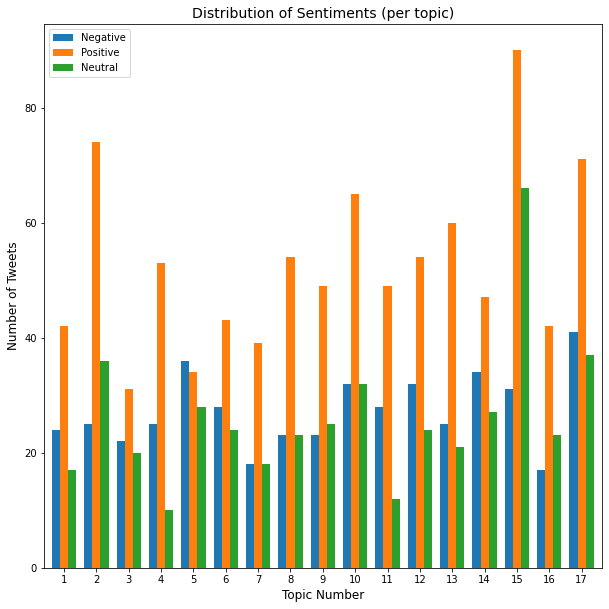

In [19]:
import matplotlib.pyplot as plt

topics = range(1, num_topics+1)
columns = ["Negative", "Positive", "Neutral"]
data = []

for i in range(num_topics):
    curr_topic = df[df["Topic"] == i+1]
    negative, positive, neutral = len(curr_topic[curr_topic["Sentiment"] == "Negative"]), len(curr_topic[curr_topic["Sentiment"] == "Positive"]), len(curr_topic[curr_topic["Sentiment"] == "Neutral"]) 
    data.append([negative, positive, neutral])

topic_sentiment_df = pd.DataFrame(data, columns=columns, index=topics)
topic_sentiment_df.plot(kind="bar", figsize=(10, 10), width=0.75)
plt.title("Distribution of Sentiments (per topic)", fontsize=14)
plt.xlabel("Topic Number", fontsize=12)
plt.ylabel("Number of Tweets", fontsize=12)
plt.gca().xaxis.set_tick_params(rotation=0)
plt.show()

## GSDMM

In [12]:
from gsdmm import MovieGroupProcess

gsdmm = MovieGroupProcess(K=17, alpha=0.1, beta=0.3, n_iters=15)

In [13]:
# vocab = set(word for doc in texts for word in doc)
n_terms = len(id2word)

doc_topic_labels = gsdmm.fit(texts, n_terms)
# doc_topic_labels

In stage 0: transferred 1517 clusters with 17 clusters populated
In stage 1: transferred 910 clusters with 17 clusters populated
In stage 2: transferred 653 clusters with 17 clusters populated
In stage 3: transferred 559 clusters with 17 clusters populated
In stage 4: transferred 499 clusters with 17 clusters populated
In stage 5: transferred 453 clusters with 17 clusters populated
In stage 6: transferred 434 clusters with 16 clusters populated
In stage 7: transferred 419 clusters with 16 clusters populated
In stage 8: transferred 422 clusters with 16 clusters populated
In stage 9: transferred 389 clusters with 16 clusters populated
In stage 10: transferred 372 clusters with 16 clusters populated
In stage 11: transferred 350 clusters with 15 clusters populated
In stage 12: transferred 373 clusters with 15 clusters populated
In stage 13: transferred 384 clusters with 16 clusters populated
In stage 14: transferred 389 clusters with 16 clusters populated


In [14]:
doc_count = np.array(gsdmm.cluster_doc_count)
print('Number of documents per topic :', doc_count)

# Topics sorted by the number of document they are allocated to
top_index = doc_count.argsort()[-15:][::-1]
print('Most important clusters (by number of docs inside):', top_index)

Number of documents per topic : [ 32 436  13  58 643   1  81   8   0 130   5   8  26  55  18 186 104]
Most important clusters (by number of docs inside): [ 4  1 15  9 16  6  3 13  0 12 14  2  7 11 10]


In [15]:
def top_words(cluster_word_distribution, top_cluster, values):
    for cluster in top_cluster:
        sort_dicts = sorted(gsdmm.cluster_word_distribution[cluster].items(), key=lambda k: k[1], reverse=True)[:values]
        print('Cluster %s : %s'%(cluster,sort_dicts))
        print('-'*120)

In [16]:
# Show the top 10 words in term frequency for each cluster 

top_words(gsdmm.cluster_word_distribution, top_index, 10)

Cluster 4 : [('singapore', 173), ('home', 59), ('time', 59), ('case', 56), ('world', 55), ('new', 53), ('amp', 51), ('stay', 50), ('people', 45), ('lockdown', 44)]
------------------------------------------------------------------------------------------------------------------------
Cluster 1 : [('go', 56), ('time', 48), ('home', 46), ('people', 41), ('year', 41), ('day', 36), ('like', 36), ('one', 35), ('want', 34), ('going', 32)]
------------------------------------------------------------------------------------------------------------------------
Cluster 15 : [('singapore', 97), ('circuitbreaker', 51), ('stayhome', 45), ('day', 27), ('may', 23), ('staysafe', 23), ('lockdown', 20), ('time', 18), ('amp', 18), ('home', 17)]
------------------------------------------------------------------------------------------------------------------------
Cluster 9 : [('case', 74), ('singapore', 48), ('new', 46), ('total', 33), ('death', 33), ('today', 22), ('may', 14), ('bangladesh', 14), ('infe

In [17]:
df["GSDMM_Topic"] = doc_topic_labels
df.head()

,url,date,rawContent,renderedContent,id,user,replyCount,retweetCount,likeCount,quoteCount,...,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags,card,viewCount,vibe,GSDMM_Topic
0,https://twitter.com/yihyng/status/126723739088...,2020-05-31 23:31:52+00:00,call call day,call call day,1267237390881402881,https://twitter.com/yihyng,0,0,1,0,...,NaN,NaN,"Coordinates(longitude=103.817832999913, latitu...","Place(id='5f1f473ed6455f55', fullName='North-E...",['covid_19'],NaN,NaN,NaN,NaN,15
1,https://twitter.com/JuiceTales/status/12672317...,2020-05-31 23:09:36+00:00,enter new phase one period healthy body grab n...,enter new phase one period healthy body grab n...,1267231786632790016,https://twitter.com/JuiceTales,0,0,0,0,...,NaN,NaN,"Coordinates(longitude=103.90126705, latitude=1...","Place(id='58a4c3a0d54e1400', fullName='Central...",NaN,NaN,NaN,NaN,NaN,12
2,https://twitter.com/sitimariamah1/status/12672...,2020-05-31 22:45:29+00:00,every new month brings new hope new dream new ...,every new month brings new hope new dream new ...,1267225719047950344,https://twitter.com/sitimariamah1,0,0,1,0,...,NaN,NaN,"Coordinates(longitude=103.93690062, latitude=1...","Place(id='6635b2fcebd13c64', fullName='East Re...",NaN,NaN,NaN,NaN,NaN,4
3,https://twitter.com/SajidTweetsBD/status/12671...,2020-05-31 15:23:06+00:00,meanwhile new zealand nine day new case pati...,meanwhile new zealand nine day new case pati...,1267114389150134272,https://twitter.com/SajidTweetsBD,0,0,0,0,...,NaN,NaN,"Coordinates(longitude=103.696411999967, latitu...","Place(id='14d9532bd696d8cb', fullName='North R...",NaN,NaN,NaN,NaN,NaN,4
4,https://twitter.com/audreytan/status/126710979...,2020-05-31 15:04:52+00:00,pandemic unlocked new thing never thought woul...,pandemic unlocked new thing never thought woul...,1267109798010478593,https://twitter.com/audreytan,0,0,1,0,...,NaN,NaN,"Coordinates(longitude=103.856, latitude=1.29306)","Place(id='58a4c3a0d54e1400', fullName='Central...",['Covid'],NaN,NaN,NaN,NaN,4


In [18]:
# Topic distribution

df.GSDMM_Topic.value_counts(dropna=False)

4     643
1     436
15    186
9     130
16    104
6      81
3      58
13     55
0      32
12     26
14     18
2      13
7       8
11      8
10      5
5       1
Name: GSDMM_Topic, dtype: int64

In [19]:
sort_dicts = dict(sorted(gsdmm.cluster_word_distribution[4].items(), key=lambda k: k[1], reverse=True))
# sort_dicts

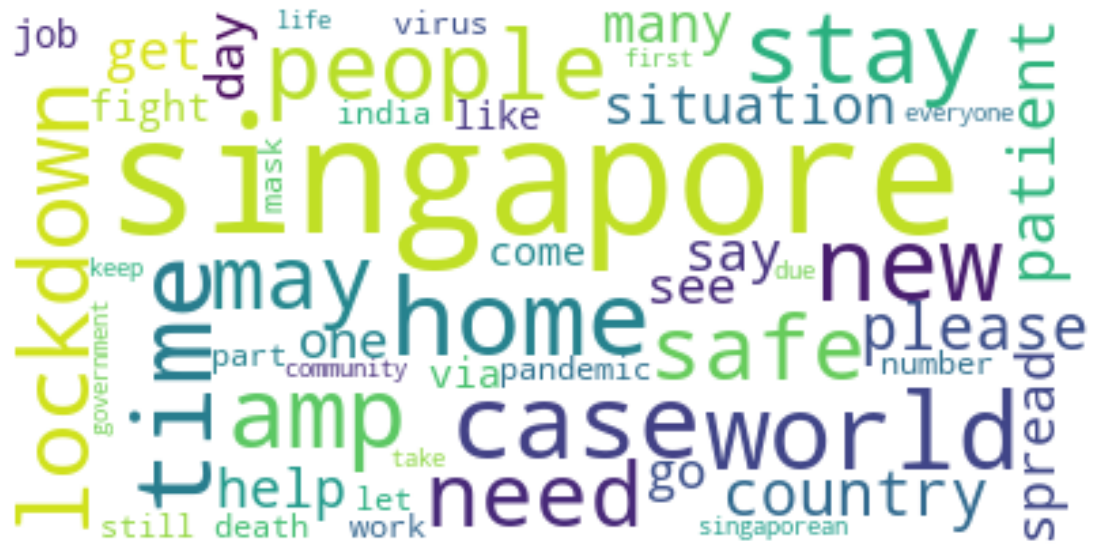

In [20]:
# Word cloud for Topic 5

wordcloud = WordCloud(background_color="white", max_words=50).generate_from_frequencies(sort_dicts)
fig, ax = plt.subplots(figsize=[20,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [21]:
def get_topics_lists(model, top_clusters, n_words):
    '''
    Gets lists of words in topics as a list of lists.
    
    model: gsdmm instance
    top_clusters:  numpy array containing indices of top_clusters
    n_words: top n number of words to include
    
    '''
    # create empty list to contain topics
    topics = []
    
    # iterate over top n clusters
    for cluster in top_clusters:
        #create sorted dictionary of word distributions
        sorted_dict = sorted(model.cluster_word_distribution[cluster].items(), key=lambda k: k[1], reverse=True)[:n_words]
         
        #create empty list to contain words
        topic = []
        
        #iterate over top n words in topic
        for k,v in sorted_dict:
            #append words to topic list
            topic.append(k)
            
        #append topics to topics list    
        topics.append(topic)
    
    return topics

In [22]:
# Check coherence score 

from gensim.models import CoherenceModel

topics = get_topics_lists(gsdmm, top_index, 10)

cm_gsdmm = CoherenceModel(topics=topics, 
                          dictionary=id2word, 
                          corpus=corpus, 
                          texts=texts, 
                          coherence='c_v')

cm_gsdmm.get_coherence()

0.5212073212182236